<div align = "center">

# **Comparacion de metodos**

</div>

## Librerias y funciones

- Librerias de python basicas

In [7]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter
from itertools import product
from scipy import stats

- Carga de los metodos

In [8]:
from src.metodos import metodo_autovector, metodo_tiempos_retorno

- Carga de las generadoras de las matrices de prueba

In [9]:
from src.matrices import generar_caminata_aleatoria, generar_caminata_doble, generar_matriz_perturbada

## Caminata aleatoria simple

Iniciando análisis de caminata aleatoria simple
Procesando: n=10, p=0.2
Procesando: n=10, p=0.4
Procesando: n=10, p=0.6
Procesando: n=10, p=0.8
Procesando: n=60, p=0.2
Procesando: n=60, p=0.4
Procesando: n=60, p=0.6
Procesando: n=60, p=0.8
Procesando: n=110, p=0.2
Procesando: n=110, p=0.4
Procesando: n=110, p=0.6
Procesando: n=110, p=0.8
Procesando: n=160, p=0.2
Procesando: n=160, p=0.4
Procesando: n=160, p=0.6
Procesando: n=160, p=0.8
Procesando: n=210, p=0.2
Procesando: n=210, p=0.4
Procesando: n=210, p=0.6
Procesando: n=210, p=0.8
Procesando: n=260, p=0.2
Procesando: n=260, p=0.4
Procesando: n=260, p=0.6
Procesando: n=260, p=0.8
Procesando: n=310, p=0.2
Procesando: n=310, p=0.4
Procesando: n=310, p=0.6
Procesando: n=310, p=0.8
Procesando: n=360, p=0.2
Procesando: n=360, p=0.4
Procesando: n=360, p=0.6
Procesando: n=360, p=0.8
Procesando: n=410, p=0.2
Procesando: n=410, p=0.4
Procesando: n=410, p=0.6
Procesando: n=410, p=0.8
Procesando: n=460, p=0.2
Procesando: n=460, p=0.4
Procesando

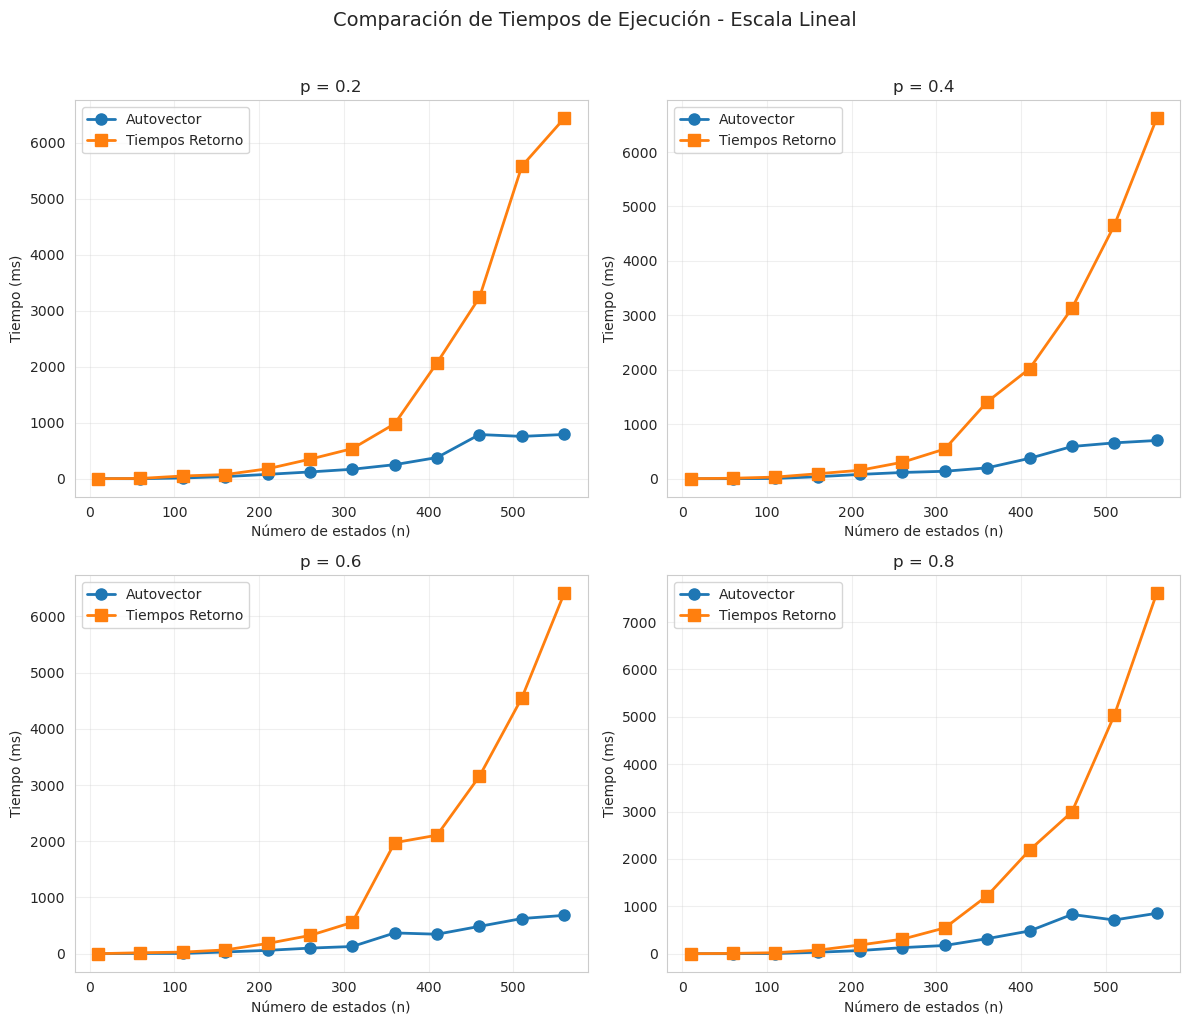

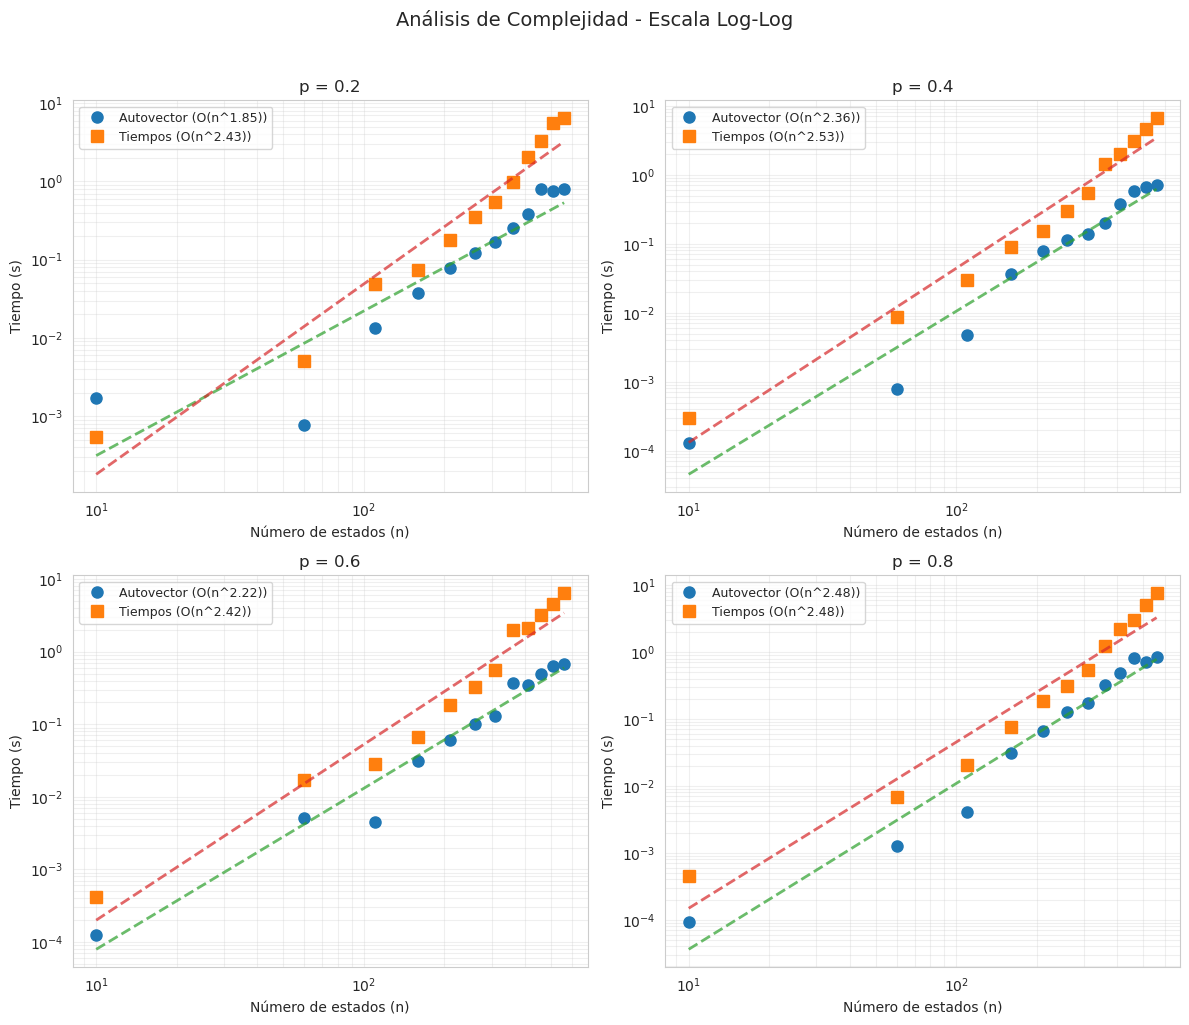


RESUMEN DE COMPLEJIDAD COMPUTACIONAL

p = 0.2:
  Autovector: O(n^1.85)
  Tiempos:    O(n^2.43)
  Ratio promedio: 4.15x

p = 0.4:
  Autovector: O(n^2.36)
  Tiempos:    O(n^2.53)
  Ratio promedio: 5.42x

p = 0.6:
  Autovector: O(n^2.22)
  Tiempos:    O(n^2.42)
  Ratio promedio: 5.03x

p = 0.8:
  Autovector: O(n^2.48)
  Tiempos:    O(n^2.48)
  Ratio promedio: 4.51x


In [10]:
# Configuración de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Parámetros del experimento
n_valores = range(10, 610, 50)  # Estados: 10, 60, 110, 160
p_valores = [0.2, 0.4, 0.6, 0.8]  # 4 valores de p

# Contenedor de resultados
resultados = []

# Experimento principal
print("Iniciando análisis de caminata aleatoria simple")
print("=" * 50)

for n, p in product(n_valores, p_valores):
    print(f"Procesando: n={n}, p={p:.1f}")
    
    # Generar matriz de transición
    P = generar_caminata_aleatoria(n, p)
    
    # Medir tiempo método autovector
    start = perf_counter()
    pi_auto = metodo_autovector(P)
    t_auto = perf_counter() - start
    
    # Medir tiempo método tiempos de retorno
    start = perf_counter()
    pi_tiempo = metodo_tiempos_retorno(P)
    t_tiempo = perf_counter() - start
    
    # Verificar convergencia
    error_conv = np.linalg.norm(pi_auto - pi_tiempo)
    
    # Guardar resultados
    resultados.append({
        'n': n,
        'p': p,
        'tiempo_autovector': t_auto,
        'tiempo_retorno': t_tiempo,
        'ratio': t_tiempo / t_auto,
        'error_convergencia': error_conv
    })

# Crear DataFrame
df_caminata_aleatoria = pd.DataFrame(resultados)

print("\nResultados obtenidos:")
print(df_caminata_aleatoria.head())
print(f"\nTotal de experimentos: {len(df_caminata_aleatoria)}")

# Gráfica 1: n vs tiempo de ejecución (escala lineal)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, p in enumerate(p_valores):
    ax = axes[idx]
    df_p = df_caminata_aleatoria[df_caminata_aleatoria['p'] == p]
    
    ax.plot(df_p['n'], df_p['tiempo_autovector'] * 1000, 
            'o-', label='Autovector', linewidth=2, markersize=8)
    ax.plot(df_p['n'], df_p['tiempo_retorno'] * 1000, 
            's-', label='Tiempos Retorno', linewidth=2, markersize=8)
    
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Tiempo (ms)')
    ax.set_title(f'p = {p}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparación de Tiempos de Ejecución - Escala Lineal', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('../images/caminata_simple_lineal.png', dpi=150, bbox_inches='tight')
plt.show()

# Gráfica 2: log-log con regresión lineal
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Almacenar exponentes para el DataFrame
exponentes_auto = []
exponentes_tiempo = []

for idx, p in enumerate(p_valores):
    ax = axes[idx]
    df_p = df_caminata_aleatoria[df_caminata_aleatoria['p'] == p]
    
    # Escala log-log
    log_n = np.log(df_p['n'].values)
    log_t_auto = np.log(df_p['tiempo_autovector'].values)
    log_t_tiempo = np.log(df_p['tiempo_retorno'].values)
    
    # Regresión lineal
    slope_auto, intercept_auto, r_auto, _, _ = stats.linregress(log_n, log_t_auto)
    slope_tiempo, intercept_tiempo, r_tiempo, _, _ = stats.linregress(log_n, log_t_tiempo)
    
    # Guardar exponentes
    exponentes_auto.append(slope_auto)
    exponentes_tiempo.append(slope_tiempo)
    
    # Graficar datos y regresión
    ax.loglog(df_p['n'], df_p['tiempo_autovector'], 
              'o', label=f'Autovector (O(n^{slope_auto:.2f}))', markersize=8)
    ax.loglog(df_p['n'], df_p['tiempo_retorno'], 
              's', label=f'Tiempos (O(n^{slope_tiempo:.2f}))', markersize=8)
    
    # Líneas de regresión
    n_fit = np.array(df_p['n'])
    ax.loglog(n_fit, np.exp(intercept_auto) * n_fit**slope_auto, 
              '--', alpha=0.7, linewidth=2)
    ax.loglog(n_fit, np.exp(intercept_tiempo) * n_fit**slope_tiempo, 
              '--', alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Tiempo (s)')
    ax.set_title(f'p = {p}')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3, which="both")

plt.suptitle('Análisis de Complejidad - Escala Log-Log', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('../images/caminata_simple_loglog.png', dpi=150, bbox_inches='tight')
plt.show()

# Agregar exponentes al DataFrame
for i, p in enumerate(p_valores):
    mask = df_caminata_aleatoria['p'] == p
    df_caminata_aleatoria.loc[mask, 'exponente_autovector'] = exponentes_auto[i]
    df_caminata_aleatoria.loc[mask, 'exponente_tiempo'] = exponentes_tiempo[i]

# Resumen estadístico
print("\n" + "=" * 50)
print("RESUMEN DE COMPLEJIDAD COMPUTACIONAL")
print("=" * 50)
for p in p_valores:
    df_p = df_caminata_aleatoria[df_caminata_aleatoria['p'] == p]
    exp_auto = df_p['exponente_autovector'].iloc[0]
    exp_tiempo = df_p['exponente_tiempo'].iloc[0]
    ratio_medio = df_p['ratio'].mean()
    print(f"\np = {p}:")
    print(f"  Autovector: O(n^{exp_auto:.2f})")
    print(f"  Tiempos:    O(n^{exp_tiempo:.2f})")
    print(f"  Ratio promedio: {ratio_medio:.2f}x")

## Caminata aleatoria doble

Iniciando análisis de caminata aleatoria doble (forma de 8)
Procesando: n=10, p=0.3, r=0.05
Procesando: n=10, p=0.3, r=0.10
Procesando: n=10, p=0.3, r=0.20
Procesando: n=10, p=0.5, r=0.05
Procesando: n=10, p=0.5, r=0.10
Procesando: n=10, p=0.5, r=0.20
Procesando: n=10, p=0.7, r=0.05
Procesando: n=10, p=0.7, r=0.10
Procesando: n=10, p=0.7, r=0.20
Procesando: n=60, p=0.3, r=0.05
Procesando: n=60, p=0.3, r=0.10
Procesando: n=60, p=0.3, r=0.20
Procesando: n=60, p=0.5, r=0.05
Procesando: n=60, p=0.5, r=0.10
Procesando: n=60, p=0.5, r=0.20
Procesando: n=60, p=0.7, r=0.05
Procesando: n=60, p=0.7, r=0.10
Procesando: n=60, p=0.7, r=0.20
Procesando: n=110, p=0.3, r=0.05
Procesando: n=110, p=0.3, r=0.10
Procesando: n=110, p=0.3, r=0.20
Procesando: n=110, p=0.5, r=0.05
Procesando: n=110, p=0.5, r=0.10
Procesando: n=110, p=0.5, r=0.20
Procesando: n=110, p=0.7, r=0.05
Procesando: n=110, p=0.7, r=0.10
Procesando: n=110, p=0.7, r=0.20
Procesando: n=160, p=0.3, r=0.05
Procesando: n=160, p=0.3, r=0.10
P

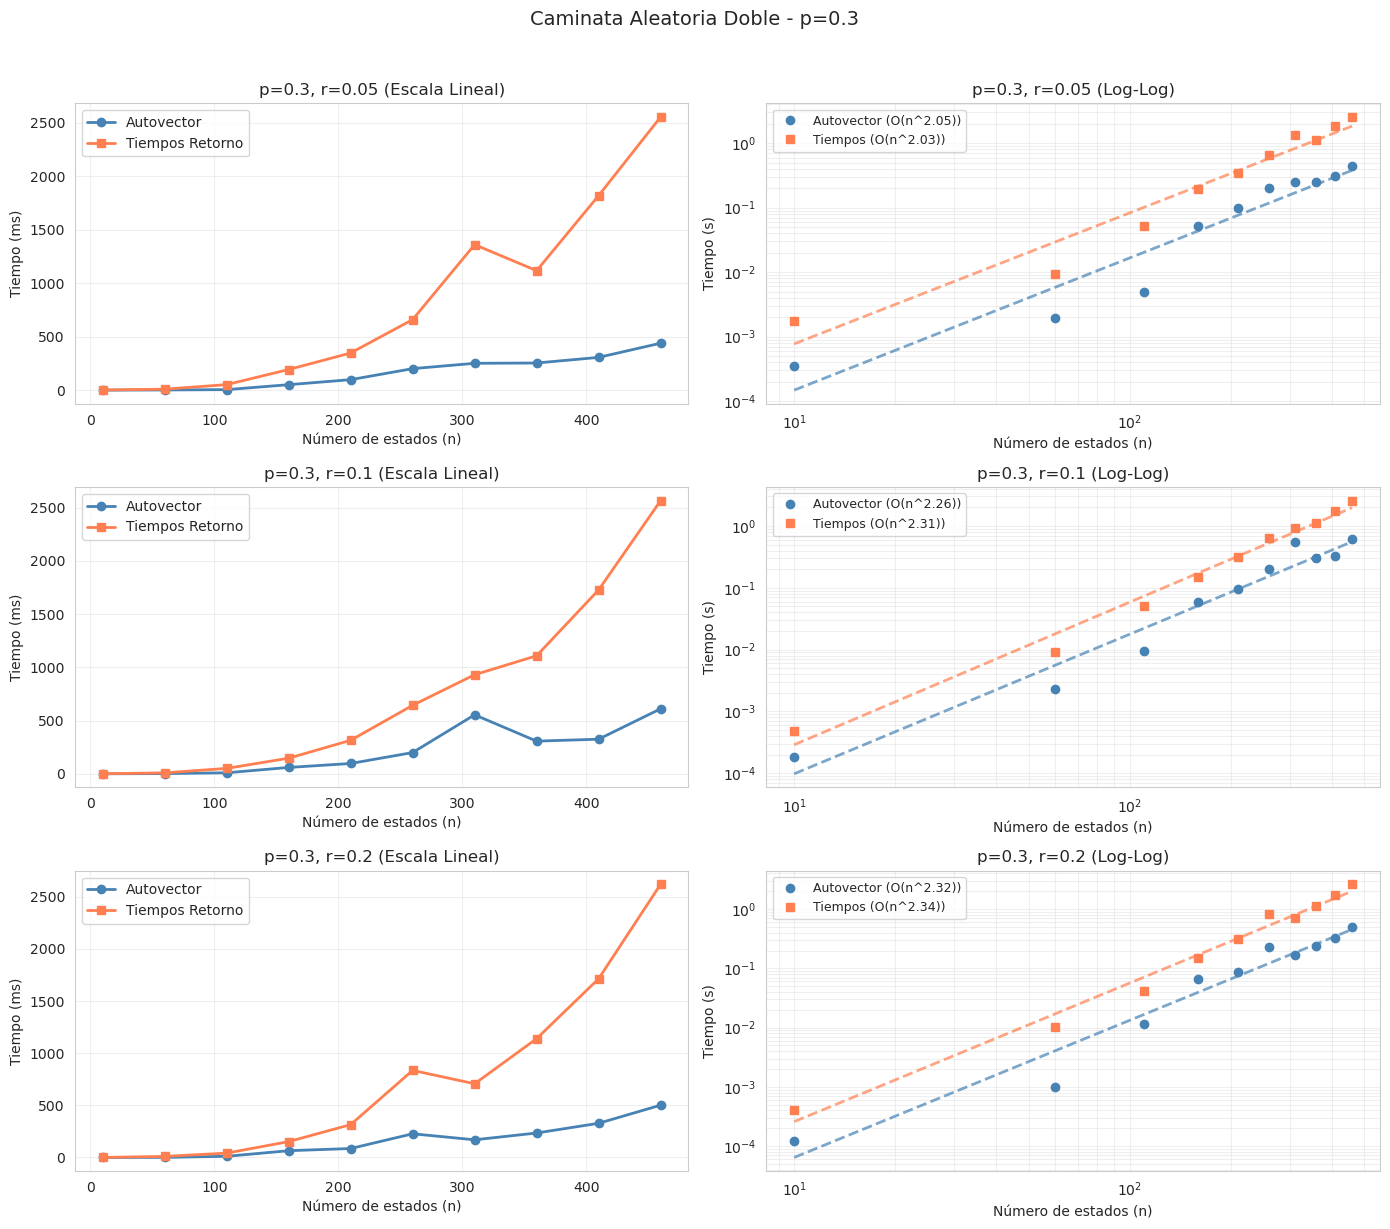

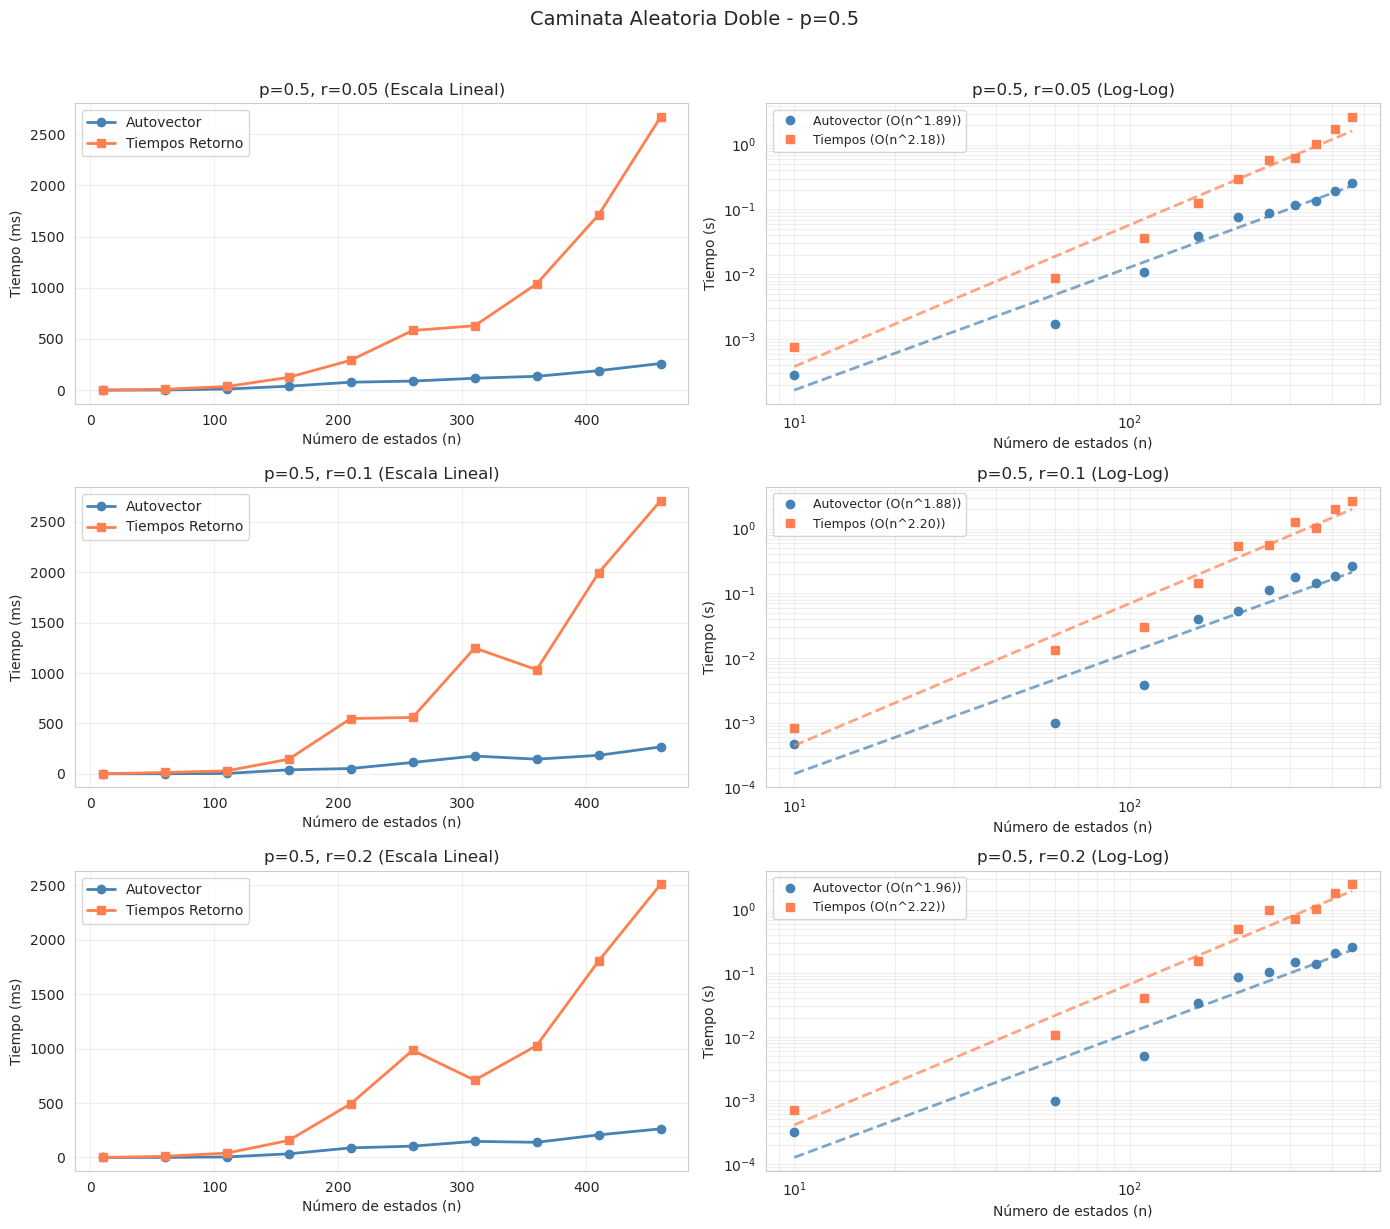

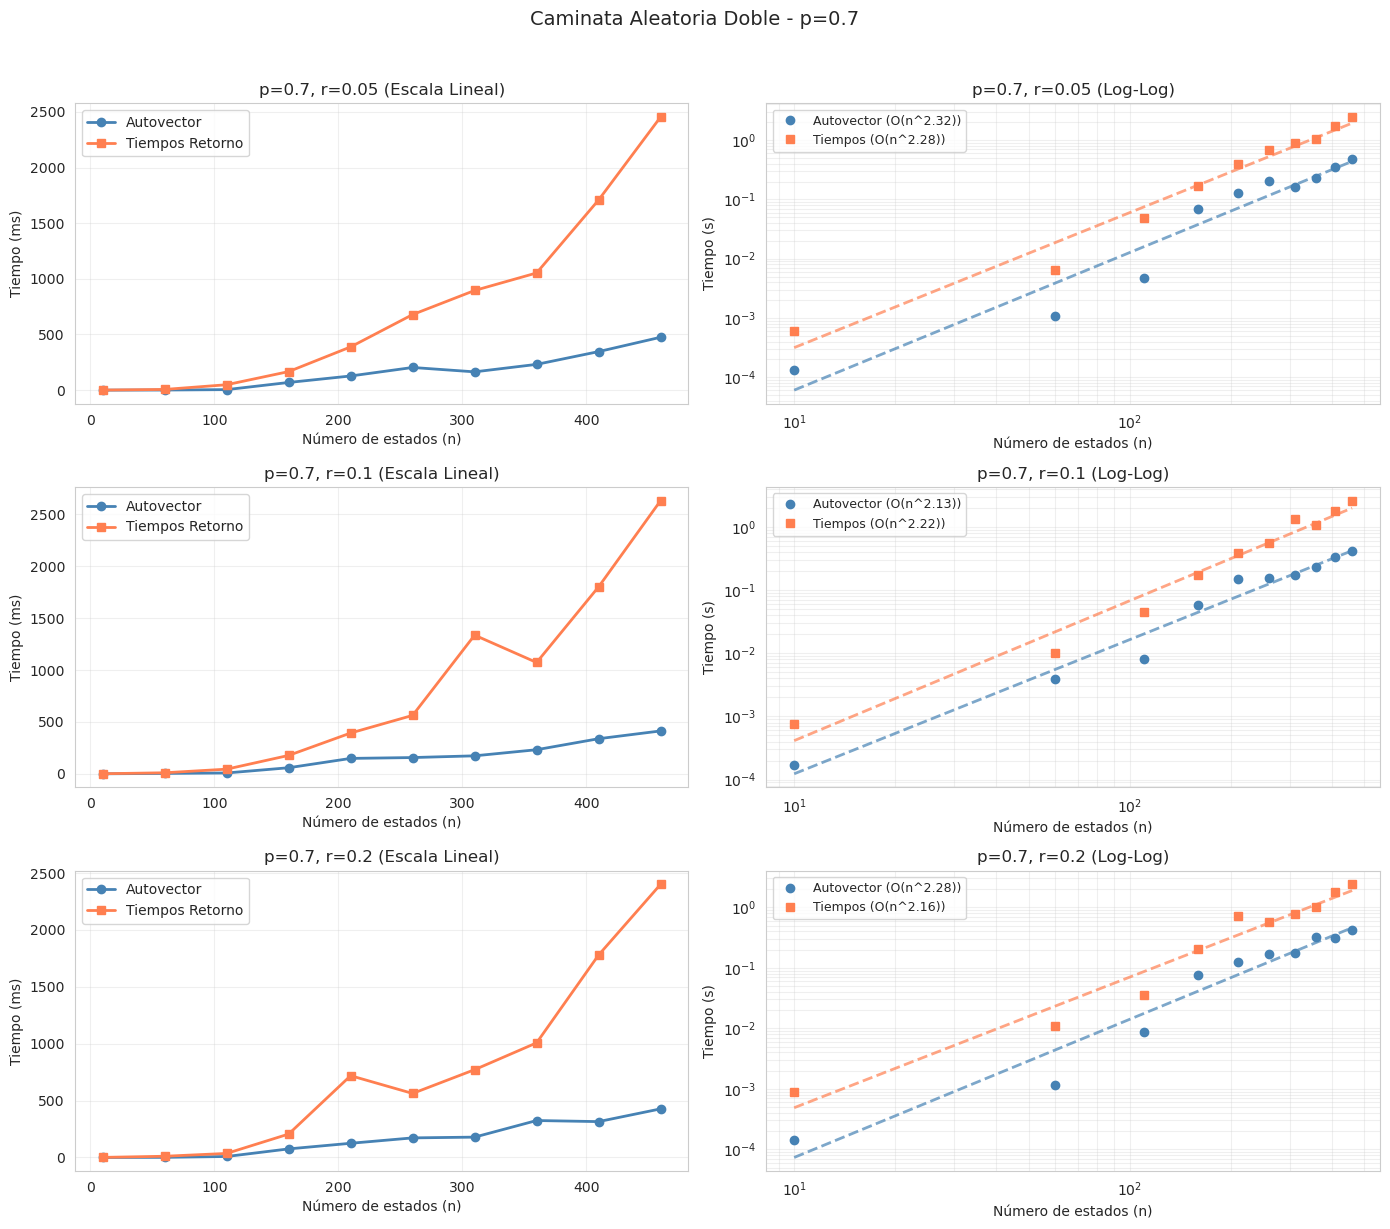

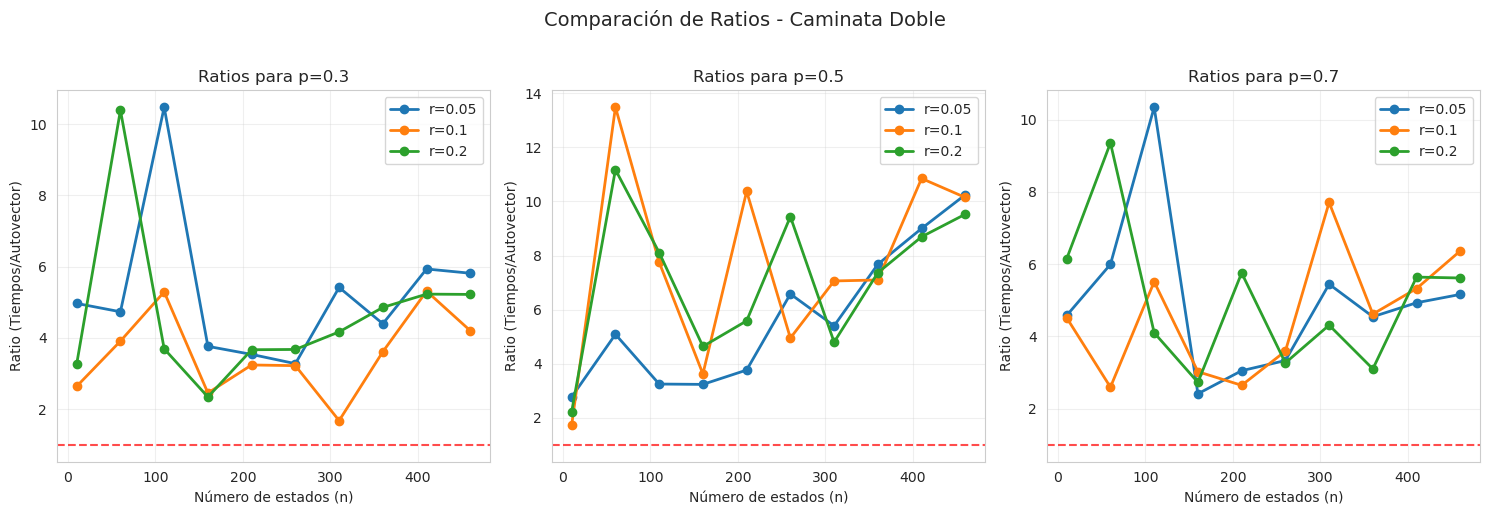


RESUMEN CAMINATA ALEATORIA DOBLE

p = 0.3:
  r=0.05: ratio=5.23x, error=8.88e-14
  r=0.1: ratio=3.56x, error=4.13e-14
  r=0.2: ratio=4.65x, error=1.42e-14

p = 0.5:
  r=0.05: ratio=5.70x, error=3.26e-13
  r=0.1: ratio=7.71x, error=1.39e-13
  r=0.2: ratio=7.16x, error=1.54e-13

p = 0.7:
  r=0.05: ratio=4.98x, error=9.26e-14
  r=0.1: ratio=4.59x, error=6.49e-14
  r=0.2: ratio=5.01x, error=2.10e-14


In [11]:
# Importar función para caminata doble
from src.matrices import generar_caminata_doble

# Parámetros del experimento para caminata doble
n_valores_doble = range(10, 510, 50)  # Solo tamaños pares
p_valores_doble = [0.3, 0.5, 0.7]
r_valores = [0.05, 0.1, 0.2]  # Probabilidades de salto entre mitades

# Contenedor de resultados
resultados_doble = []

print("Iniciando análisis de caminata aleatoria doble (forma de 8)")
print("=" * 55)

for n, p, r in product(n_valores_doble, p_valores_doble, r_valores):
    # Asegurar que n sea par
    if n % 2 != 0:
        continue
        
    print(f"Procesando: n={n}, p={p:.1f}, r={r:.2f}")
    
    try:
        # Generar matriz de transición
        P = generar_caminata_doble(n, p, r)
        
        # Verificar que las filas sumen 1
        if not np.allclose(P.sum(axis=1), 1.0):
            print(f"  ¡Advertencia! Las filas no suman 1 para n={n}, p={p}, r={r}")
            continue
        
        # Medir tiempo método autovector
        start = perf_counter()
        pi_auto = metodo_autovector(P)
        t_auto = perf_counter() - start
        
        # Medir tiempo método tiempos de retorno
        start = perf_counter()
        pi_tiempo = metodo_tiempos_retorno(P)
        t_tiempo = perf_counter() - start
        
        # Verificar convergencia
        error_conv = np.linalg.norm(pi_auto - pi_tiempo)
        
        # Guardar resultados
        resultados_doble.append({
            'n': n,
            'p': p,
            'r': r,
            'tiempo_autovector': t_auto,
            'tiempo_retorno': t_tiempo,
            'ratio': t_tiempo / t_auto,
            'error_convergencia': error_conv
        })
        
    except Exception as e:
        print(f"  Error en n={n}, p={p}, r={r}: {str(e)}")
        continue

# Crear DataFrame
df_caminata_doble = pd.DataFrame(resultados_doble)

print(f"\nTotal de experimentos exitosos: {len(df_caminata_doble)}")
if len(df_caminata_doble) > 0:
    print("\nPrimeros resultados:")
    print(df_caminata_doble.head())

# Análisis separado por valor de p
if len(df_caminata_doble) > 0:
    # Crear gráficas separadas para cada valor de p
    for p in p_valores_doble:
        df_p = df_caminata_doble[df_caminata_doble['p'] == p]
        
        if len(df_p) > 0:
            fig, axes = plt.subplots(len(r_valores), 2, figsize=(14, 4 * len(r_valores)))
            if len(r_valores) == 1:
                axes = axes.reshape(1, -1)
            
            for idx, r in enumerate(r_valores):
                df_pr = df_p[df_p['r'] == r]
                
                if len(df_pr) > 0:
                    # Gráfico lineal
                    ax = axes[idx, 0]
                    ax.plot(df_pr['n'], df_pr['tiempo_autovector'] * 1000, 
                            'o-', label='Autovector', color='steelblue', linewidth=2, markersize=6)
                    ax.plot(df_pr['n'], df_pr['tiempo_retorno'] * 1000, 
                            's-', label='Tiempos Retorno', color='coral', linewidth=2, markersize=6)
                    
                    ax.set_xlabel('Número de estados (n)')
                    ax.set_ylabel('Tiempo (ms)')
                    ax.set_title(f'p={p}, r={r} (Escala Lineal)')
                    ax.legend()
                    ax.grid(True, alpha=0.3)
                    
                    # Gráfico log-log
                    ax = axes[idx, 1]
                    if len(df_pr) > 3:  # Mínimo 4 puntos para regresión
                        log_n = np.log(df_pr['n'].values)
                        log_t_auto = np.log(df_pr['tiempo_autovector'].values)
                        log_t_tiempo = np.log(df_pr['tiempo_retorno'].values)
                        
                        slope_auto, intercept_auto, _, _, _ = stats.linregress(log_n, log_t_auto)
                        slope_tiempo, intercept_tiempo, _, _, _ = stats.linregress(log_n, log_t_tiempo)
                        
                        ax.loglog(df_pr['n'], df_pr['tiempo_autovector'], 
                                  'o', label=f'Autovector (O(n^{slope_auto:.2f}))', 
                                  color='steelblue', markersize=6)
                        ax.loglog(df_pr['n'], df_pr['tiempo_retorno'], 
                                  's', label=f'Tiempos (O(n^{slope_tiempo:.2f}))', 
                                  color='coral', markersize=6)
                        
                        # Líneas de regresión
                        n_fit = np.array(df_pr['n'])
                        ax.loglog(n_fit, np.exp(intercept_auto) * n_fit**slope_auto, 
                                  '--', alpha=0.7, linewidth=2, color='steelblue')
                        ax.loglog(n_fit, np.exp(intercept_tiempo) * n_fit**slope_tiempo, 
                                  '--', alpha=0.7, linewidth=2, color='coral')
                    
                    ax.set_xlabel('Número de estados (n)')
                    ax.set_ylabel('Tiempo (s)')
                    ax.set_title(f'p={p}, r={r} (Log-Log)')
                    ax.legend(fontsize=9)
                    ax.grid(True, alpha=0.3, which="both")
            
            plt.suptitle(f'Caminata Aleatoria Doble - p={p}', fontsize=14, y=1.02)
            plt.tight_layout()
            plt.savefig(f'../images/caminata_doble_p_{p:.1f}.png', dpi=150, bbox_inches='tight')
            plt.show()
    
    # Gráfica de resumen con ratios
    fig, axes = plt.subplots(1, len(p_valores_doble), figsize=(5 * len(p_valores_doble), 5))
    if len(p_valores_doble) == 1:
        axes = [axes]
    
    for idx, p in enumerate(p_valores_doble):
        ax = axes[idx]
        df_p = df_caminata_doble[df_caminata_doble['p'] == p]
        
        for r in r_valores:
            df_pr = df_p[df_p['r'] == r]
            if len(df_pr) > 0:
                ax.plot(df_pr['n'], df_pr['ratio'], 
                        'o-', label=f'r={r}', linewidth=2, markersize=6)
        
        ax.set_xlabel('Número de estados (n)')
        ax.set_ylabel('Ratio (Tiempos/Autovector)')
        ax.set_title(f'Ratios para p={p}')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.axhline(y=1, color='red', linestyle='--', alpha=0.7)
    
    plt.suptitle('Comparación de Ratios - Caminata Doble', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig('../images/caminata_doble_ratios.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Resumen estadístico
    print("\n" + "=" * 55)
    print("RESUMEN CAMINATA ALEATORIA DOBLE")
    print("=" * 55)
    
    for p in p_valores_doble:
        df_p = df_caminata_doble[df_caminata_doble['p'] == p]
        if len(df_p) > 0:
            print(f"\np = {p}:")
            for r in r_valores:
                df_pr = df_p[df_p['r'] == r]
                if len(df_pr) > 0:
                    ratio_medio = df_pr['ratio'].mean()
                    error_medio = df_pr['error_convergencia'].mean()
                    print(f"  r={r}: ratio={ratio_medio:.2f}x, error={error_medio:.2e}")
else:
    print("No se pudieron generar resultados para la caminata doble")

## Caminata aleatoria con perturbacion

Iniciando análisis de matriz perturbada (casi-identidad)
Procesando: n=10
Procesando: n=50
Procesando: n=90
Procesando: n=130
Procesando: n=170
Procesando: n=210
Procesando: n=250
Procesando: n=290
Procesando: n=330
Procesando: n=370

Total de experimentos exitosos: 10

Primeros resultados:
     n  tiempo_autovector  tiempo_retorno      ratio  error_convergencia  \
0   10           0.001784        0.000959   0.537597        7.892705e-08   
1   50           0.000592        0.006787  11.471308        1.737122e-06   
2   90           0.002963        0.075612  25.517333        5.783952e-06   
3  130           0.068585        0.094485   1.377643        1.443366e-05   
4  170           0.023396        0.107133   4.579135        9.931454e-06   

   numero_condicion  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  


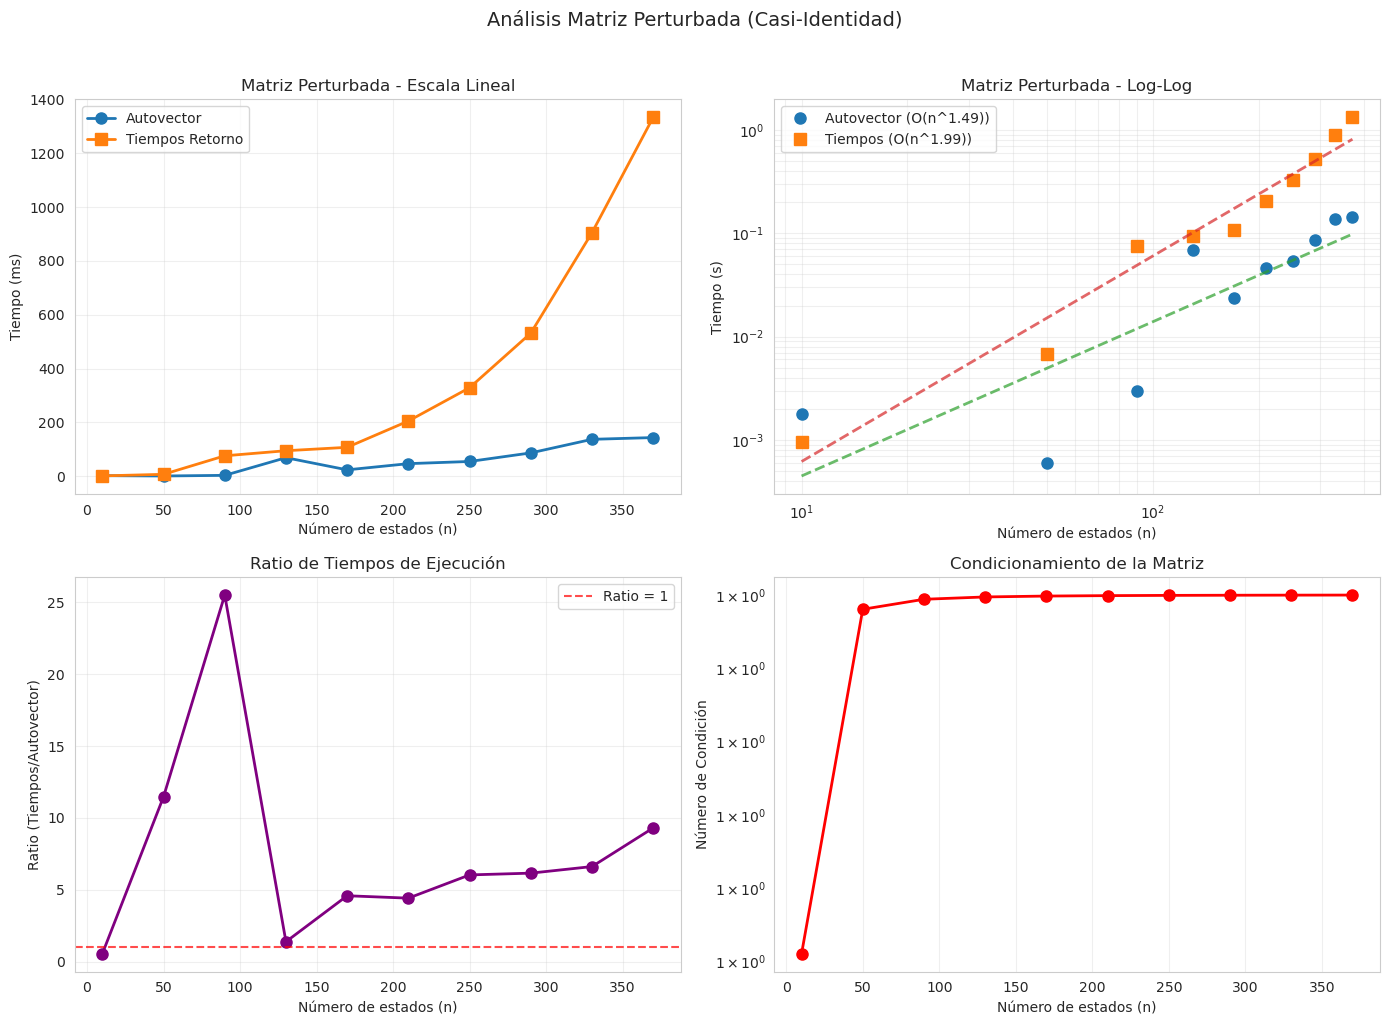


RESUMEN MATRIZ PERTURBADA
Ratio promedio: 7.60 ± 7.09
Error convergencia promedio: 2.71e-03
Número de condición promedio: 1.00e+00

Complejidades estimadas:
  Autovector: O(n^1.49)
  Tiempos:    O(n^1.99)

Rango de números de condición: 1.00e+00 - 1.00e+00


In [12]:
# Importar función para matriz perturbada
from src.matrices import generar_matriz_perturbada

# Parámetros del experimento para matriz perturbada
n_valores_perturbada = range(10, 410, 40)  # Menores tamaños para matrices casi-identidad

# Contenedor de resultados
resultados_perturbada = []

print("Iniciando análisis de matriz perturbada (casi-identidad)")
print("=" * 55)

for n in n_valores_perturbada:
    print(f"Procesando: n={n}")
    
    try:
        # Generar matriz de transición
        P = generar_matriz_perturbada(n)
        
        # Verificar que las filas sumen 1
        if not np.allclose(P.sum(axis=1), 1.0):
            print(f"  ¡Advertencia! Las filas no suman 1 para n={n}")
            continue
        
        # Medir tiempo método autovector
        start = perf_counter()
        pi_auto = metodo_autovector(P)
        t_auto = perf_counter() - start
        
        # Medir tiempo método tiempos de retorno
        start = perf_counter()
        pi_tiempo = metodo_tiempos_retorno(P)
        t_tiempo = perf_counter() - start
        
        # Verificar convergencia
        error_conv = np.linalg.norm(pi_auto - pi_tiempo)
        
        # Calcular número de condición
        cond_number = np.linalg.cond(P)
        
        # Guardar resultados
        resultados_perturbada.append({
            'n': n,
            'tiempo_autovector': t_auto,
            'tiempo_retorno': t_tiempo,
            'ratio': t_tiempo / t_auto,
            'error_convergencia': error_conv,
            'numero_condicion': cond_number
        })
        
    except Exception as e:
        print(f"  Error en n={n}: {str(e)}")
        continue

# Crear DataFrame
df_perturbada = pd.DataFrame(resultados_perturbada)

print(f"\nTotal de experimentos exitosos: {len(df_perturbada)}")
if len(df_perturbada) > 0:
    print("\nPrimeros resultados:")
    print(df_perturbada.head())

# Análisis de matriz perturbada
if len(df_perturbada) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Gráfico 1: Tiempo vs n (escala lineal)
    ax = axes[0, 0]
    ax.plot(df_perturbada['n'], df_perturbada['tiempo_autovector'] * 1000, 
            'o-', label='Autovector', linewidth=2, markersize=8)
    ax.plot(df_perturbada['n'], df_perturbada['tiempo_retorno'] * 1000, 
            's-', label='Tiempos Retorno', linewidth=2, markersize=8)
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Tiempo (ms)')
    ax.set_title('Matriz Perturbada - Escala Lineal')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Gráfico 2: Análisis log-log
    ax = axes[0, 1]
    if len(df_perturbada) > 3:
        log_n = np.log(df_perturbada['n'].values)
        log_t_auto = np.log(df_perturbada['tiempo_autovector'].values)
        log_t_tiempo = np.log(df_perturbada['tiempo_retorno'].values)
        
        slope_auto, intercept_auto, _, _, _ = stats.linregress(log_n, log_t_auto)
        slope_tiempo, intercept_tiempo, _, _, _ = stats.linregress(log_n, log_t_tiempo)
        
        ax.loglog(df_perturbada['n'], df_perturbada['tiempo_autovector'], 
                  'o', label=f'Autovector (O(n^{slope_auto:.2f}))', markersize=8)
        ax.loglog(df_perturbada['n'], df_perturbada['tiempo_retorno'], 
                  's', label=f'Tiempos (O(n^{slope_tiempo:.2f}))', markersize=8)
        
        # Líneas de regresión
        n_fit = np.array(df_perturbada['n'])
        ax.loglog(n_fit, np.exp(intercept_auto) * n_fit**slope_auto, 
                  '--', alpha=0.7, linewidth=2)
        ax.loglog(n_fit, np.exp(intercept_tiempo) * n_fit**slope_tiempo, 
                  '--', alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Tiempo (s)')
    ax.set_title('Matriz Perturbada - Log-Log')
    ax.legend()
    ax.grid(True, alpha=0.3, which="both")
    
    # Gráfico 3: Ratio de tiempos vs n
    ax = axes[1, 0]
    ax.plot(df_perturbada['n'], df_perturbada['ratio'], 
            'o-', color='purple', linewidth=2, markersize=8)
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Ratio (Tiempos/Autovector)')
    ax.set_title('Ratio de Tiempos de Ejecución')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Ratio = 1')
    ax.legend()
    
    # Gráfico 4: Número de condición vs n
    ax = axes[1, 1]
    ax.semilogy(df_perturbada['n'], df_perturbada['numero_condicion'], 
                'o-', color='red', linewidth=2, markersize=8)
    ax.set_xlabel('Número de estados (n)')
    ax.set_ylabel('Número de Condición')
    ax.set_title('Condicionamiento de la Matriz')
    ax.grid(True, alpha=0.3)
    
    plt.suptitle('Análisis Matriz Perturbada (Casi-Identidad)', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig('../images/matriz_perturbada_analisis.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Resumen estadístico
    print("\n" + "=" * 55)
    print("RESUMEN MATRIZ PERTURBADA")
    print("=" * 55)
    
    ratio_medio = df_perturbada['ratio'].mean()
    ratio_std = df_perturbada['ratio'].std()
    error_medio = df_perturbada['error_convergencia'].mean()
    cond_medio = df_perturbada['numero_condicion'].mean()
    
    print(f"Ratio promedio: {ratio_medio:.2f} ± {ratio_std:.2f}")
    print(f"Error convergencia promedio: {error_medio:.2e}")
    print(f"Número de condición promedio: {cond_medio:.2e}")
    
    if len(df_perturbada) > 3:
        print(f"\nComplejidades estimadas:")
        print(f"  Autovector: O(n^{slope_auto:.2f})")
        print(f"  Tiempos:    O(n^{slope_tiempo:.2f})")
    
    print(f"\nRango de números de condición: {df_perturbada['numero_condicion'].min():.2e} - {df_perturbada['numero_condicion'].max():.2e}")
    
    # Análisis especial para matrices casi-singulares
    if df_perturbada['numero_condicion'].max() > 1e10:
        print("\n¡ADVERTENCIA! Matrices mal condicionadas detectadas (κ > 1e10)")
        print("Esto puede afectar la precisión numérica de los métodos.")
        
else:
    print("No se pudieron generar resultados para la matriz perturbada")